In [1]:
import pandas as pd

## Food Data Cleaning

In [2]:
df = pd.read_csv('USDA-Agricultural-Production.csv', index_col=0)

In [17]:
df.head(10)

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
0,"Almonds, Shelled Basis",GR,Greece,1983,Beginning Stocks,(MT),0.0,198400
1,"Almonds, Shelled Basis",GR,Greece,1983,Domestic Consumption,(MT),9700.0,198400
2,"Almonds, Shelled Basis",GR,Greece,1983,Ending Stocks,(MT),345.0,198400
3,"Almonds, Shelled Basis",GR,Greece,1983,Exports,(MT),4300.0,198400
4,"Almonds, Shelled Basis",GR,Greece,1983,Imports,(MT),45.0,198400
5,"Almonds, Shelled Basis",GR,Greece,1983,Production,(MT),14300.0,198400
6,"Almonds, Shelled Basis",GR,Greece,1983,Total Distribution,(MT),14345.0,198400
7,"Almonds, Shelled Basis",GR,Greece,1983,Total Supply,(MT),14345.0,198400
8,"Almonds, Shelled Basis",GR,Greece,1984,Beginning Stocks,(MT),345.0,198500
9,"Almonds, Shelled Basis",GR,Greece,1984,Domestic Consumption,(MT),11500.0,198500


In [21]:
df = df[df['Attribute_Description'] == 'Production']

In [91]:
foods = ['Wheat', 'Corn', 'Rice, Milled']
df = df[df['Commodity_Description'].isin(foods)]

In [92]:
df.reset_index(drop=True, inplace=True)
df

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
0,Corn,AF,Afghanistan,1960,Production,(1000 MT),700.0,200607
1,Corn,AF,Afghanistan,1961,Production,(1000 MT),700.0,200607
2,Corn,AF,Afghanistan,1962,Production,(1000 MT),700.0,200607
3,Corn,AF,Afghanistan,1963,Production,(1000 MT),713.0,200607
4,Corn,AF,Afghanistan,1964,Production,(1000 MT),720.0,200607
...,...,...,...,...,...,...,...,...
119134,Wheat,RH,Zimbabwe,2017,Production,(1000 MT),158.0,202203
119135,Wheat,RH,Zimbabwe,2018,Production,(1000 MT),170.0,202203
119136,Wheat,RH,Zimbabwe,2019,Production,(1000 MT),95.0,202203
119137,Wheat,RH,Zimbabwe,2020,Production,(1000 MT),213.0,202203


In [93]:
df.to_csv('USDA-Staples.csv')

In [95]:
df['Seen_On'] = pd.Series([pd.to_datetime(x, format='%Y%m') for x in df['Seen_On']])

C:\Users\josep\AppData\Local\Temp\ipykernel_16428\3173993778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seen_On'] = pd.Series([pd.to_datetime(x, format='%Y%m') for x in df['Seen_On']])


In [104]:
len(df.loc[df['Year'] == 2021, 'Country_Name'].unique())
len(df.Country_Name.unique())

187

## Population Data Cleaning

In [105]:
pop = pd.read_csv('world_population.csv')

In [114]:
pop = pop[['Country/Territory', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Growth Rate']]
pop.head()

,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,1.0257
1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,0.9957
2,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,1.0164
3,American Samoa,44273,46189,51368,54849,58230,47818,32886,27075,0.9831
4,Andorra,79824,77700,71746,71519,66097,53569,35611,19860,1.0100


In [116]:
pop.to_csv('population-cleaned.csv')

## Try Linear Regression

In [46]:
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
#remove pandas import if already imported above.

In [3]:
pop2 = pd.read_csv('population-cleaned.csv')
food2 = pd.read_csv('USDA-Staples.csv')

C:\Users\josep\AppData\Local\Temp\ipykernel_16428\4112724335.py:1: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  popWfoodinfo = pop[pop['Country/Territory'].isin(df.Country_Name) & df['Year'] == 2020]
C:\Users\josep\AppData\Local\Temp\ipykernel_16428\4112724335.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popWfoodinfo = pop[pop['Country/Territory'].isin(df.Country_Name) & df['Year'] == 2020]


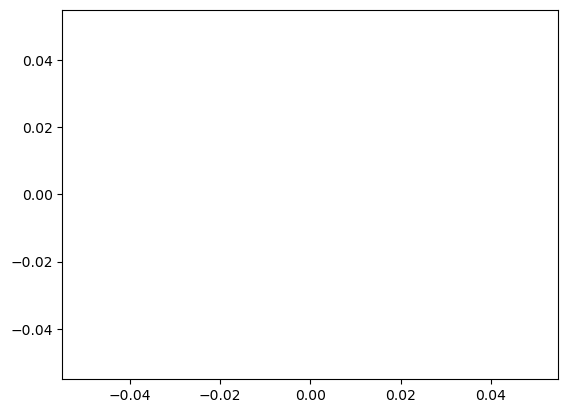

In [161]:
popWfoodinfo = pop[pop['Country/Territory'].isin(df.Country_Name) & df['Year'] == 2020]
popWfoodinfo
plt.scatter(
    df.loc[df['Country_Name'].isin(popWfoodinfo['Country/Territory']) & (df['Commodity_Description'] == 'Corn') & (df['Year'] == 2020), 'Value'], 
    popWfoodinfo.loc[:, '2020 Population']
    )

In [157]:
df.loc[df['Country_Name'].isin(popWfoodinfo['Country/Territory']) & (df['Commodity_Description'] == 'Corn') & (df['Year'] == 2020), 'Value']

105696       230.0
105697       375.0
105699         1.0
105702      2000.0
105704     50000.0
            ...   
118646     16951.0
118651       313.0
118655        74.0
118669    358447.0
118671       770.0
Name: Value, Length: 1725, dtype: float64

In [ ]:
#2/21

ValueError: x and y must be the same size

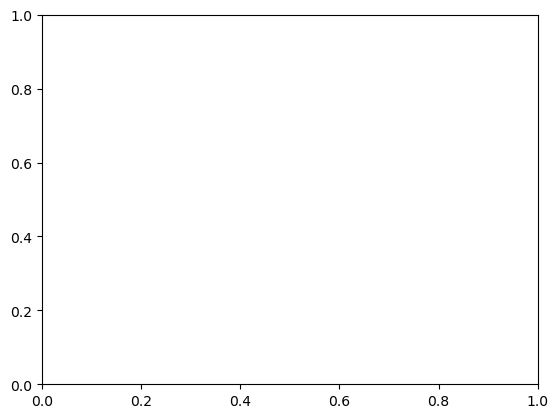

In [4]:
plt.scatter(
    food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) & (food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2020), 'Value'], 
    pop2.loc[:, '2020 Population']
    )

In [11]:
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory'])]

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
0,0,Corn,AF,Afghanistan,1960,Production,(1000 MT),700.0,200607
1,1,Corn,AF,Afghanistan,1961,Production,(1000 MT),700.0,200607
2,2,Corn,AF,Afghanistan,1962,Production,(1000 MT),700.0,200607
3,3,Corn,AF,Afghanistan,1963,Production,(1000 MT),713.0,200607
4,4,Corn,AF,Afghanistan,1964,Production,(1000 MT),720.0,200607
...,...,...,...,...,...,...,...,...,...
119134,119134,Wheat,RH,Zimbabwe,2017,Production,(1000 MT),158.0,202203
119135,119135,Wheat,RH,Zimbabwe,2018,Production,(1000 MT),170.0,202203
119136,119136,Wheat,RH,Zimbabwe,2019,Production,(1000 MT),95.0,202203
119137,119137,Wheat,RH,Zimbabwe,2020,Production,(1000 MT),213.0,202203


In [14]:
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) & (food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2020)]
#corn produced by each country at 2020
#subtracts 143 rows with food2['Country_Name'].isin(pop2['Country/Territory']) & 
#some rows that should be gone, are not. like Angola

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
105696,105696,Corn,AF,Afghanistan,2020,Production,(1000 MT),230.0,202006
105697,105697,Corn,AL,Albania,2020,Production,(1000 MT),375.0,202006
105699,105699,Corn,AG,Algeria,2020,Production,(1000 MT),1.0,202006
105702,105702,Corn,AO,Angola,2020,Production,(1000 MT),2000.0,202006
105704,105704,Corn,AR,Argentina,2020,Production,(1000 MT),50000.0,202006
...,...,...,...,...,...,...,...,...,...
118646,118646,Corn,SF,South Africa,2020,Production,(1000 MT),16951.0,202203
118651,118651,Corn,CE,Sri Lanka,2020,Production,(1000 MT),313.0,202203
118655,118655,Corn,TW,Taiwan,2020,Production,(1000 MT),74.0,202203
118669,118669,Corn,US,United States,2020,Production,(1000 MT),358447.0,202203


In [18]:
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) & (food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2020), "Value"]


105696       230.0
105697       375.0
105699         1.0
105702      2000.0
105704     50000.0
            ...   
118646     16951.0
118651       313.0
118655        74.0
118669    358447.0
118671       770.0
Name: Value, Length: 1725, dtype: float64

In [14]:
pop2.loc[:, '2020 Population']
# population of the countries that produced the food. 

0      38972230
1       2866849
2      43451666
3         46189
4         77700
         ...   
229       11655
230      556048
231    32284046
232    18927715
233    15669666
Name: 2020 Population, Length: 234, dtype: int64

In [15]:
pop2.isin(food2['Country_Name'])

,Unnamed: 0,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
0,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False


In [28]:
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) == False]

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
234,234,Corn,AM,"Armenia, Republic of",1987,Production,(1000 MT),0.0,200607
235,235,Corn,AM,"Armenia, Republic of",1988,Production,(1000 MT),0.0,200607
236,236,Corn,AM,"Armenia, Republic of",1989,Production,(1000 MT),0.0,200607
237,237,Corn,AM,"Armenia, Republic of",1990,Production,(1000 MT),0.0,200607
238,238,Corn,AM,"Armenia, Republic of",1991,Production,(1000 MT),0.0,200607
...,...,...,...,...,...,...,...,...,...
119011,119011,Wheat,E4,European Union,2019,Production,(1000 MT),138799.0,202203
119012,119012,Wheat,E4,European Union,2020,Production,(1000 MT),126930.0,202203
119013,119013,Wheat,E4,European Union,2021,Production,(1000 MT),139000.0,202203
119045,119045,Wheat,KN,"Korea, North",2021,Production,(1000 MT),65.0,202203


In [44]:
food2.loc[(food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2019) & (food2['Country_Name'] == 'United States')]

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
99189,99189,Corn,US,United States,2019,Production,(1000 MT),381780.0,201905
99958,99958,Corn,US,United States,2019,Production,(1000 MT),347488.0,201906
100430,100430,Corn,US,United States,2019,Production,(1000 MT),352441.0,201907
100917,100917,Corn,US,United States,2019,Production,(1000 MT),353093.0,201908
101555,101555,Corn,US,United States,2019,Production,(1000 MT),350011.0,201910
102293,102293,Corn,US,United States,2019,Production,(1000 MT),347006.0,201911
102783,102783,Corn,US,United States,2019,Production,(1000 MT),350515.0,201909
103288,103288,Corn,US,United States,2019,Production,(1000 MT),347006.0,201912
103771,103771,Corn,US,United States,2019,Production,(1000 MT),347782.0,202001
104227,104227,Corn,US,United States,2019,Production,(1000 MT),347782.0,202002


In [36]:
pop2.loc[pop2['Country/Territory']=='United States']

,Unnamed: 0,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
221,221,United States,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,1.0038


ValueError: x and y must be the same size

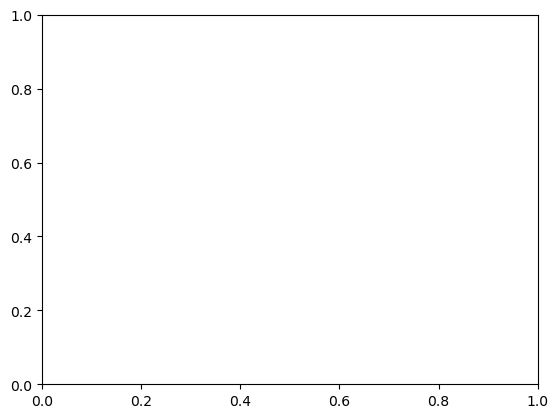

In [34]:
plt.scatter(x,y)